In [1]:
import torch


In [2]:
#one_axis:vector
#two_axis:matrix
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [3]:
x.numel()
x.shape

torch.Size([12])

In [4]:
X = x.reshape(4,3)
X

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])

In [5]:
#OR
X = x.reshape(-1,3)
X

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])

In [6]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [7]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [8]:
X[-1], X[0:3]

(tensor([ 9., 10., 11.]),
 tensor([[0., 1., 2.],
         [3., 4., 5.],
         [6., 7., 8.]]))

In [9]:
X[-1,2] = 0
X

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10.,  0.]])

In [10]:
X[:3,:] = 12
X

tensor([[12., 12., 12.],
        [12., 12., 12.],
        [12., 12., 12.],
        [ 9., 10.,  0.]])

In [11]:
torch.exp(x) #unary_operator = R->R

tensor([1.6275e+05, 1.6275e+05, 1.6275e+05, 1.6275e+05, 1.6275e+05, 1.6275e+05,
        1.6275e+05, 1.6275e+05, 1.6275e+05, 8.1031e+03, 2.2026e+04, 1.0000e+00])

In [12]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  #Binary_operators=R,R->R

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [13]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X,Y), dim=0), torch.cat((X,Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [14]:
X==Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [15]:
X.sum()

tensor(66.)

In [16]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(4).reshape((1,4))
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1, 2, 3]]))

In [17]:
a + b

tensor([[0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5]])

In [18]:
#We can assign the result of an operation to a previously allocated array Y by using slice notation: Y[:] = <expression>.

In [19]:
Z = torch.zeros_like(Y)
print('id(Z):',id(Z))
Z[:] = X + Y
print('id(Z):',id(Z))

id(Z): 140138629379184
id(Z): 140138629379184


In [20]:
#Day-2
#Data-Preprocessing

In [21]:
import os
os.makedirs(os.path.join('..','data'), exist_ok=True)
data_file = os.path.join('..','data','tiny_house.csv')
with open(data_file,'w') as f:
    f.write('''NumRooms,Rooftype,Price
    NA,NA,127500
    2,NA,106000
    4,SLATE,178100
    NA,NA,140000''')

In [22]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

  NumRooms Rooftype   Price
0       NA      NaN  127500
1        2      NaN  106000
2        4    SLATE  178100
3       NA      NaN  140000


In [23]:
inputs, targets = data.iloc[:,0:2],data.iloc[:,2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms_    2  NumRooms_    4  NumRooms_    NA  NumRooms_nan  \
0           False           False             True         False   
1            True           False            False         False   
2           False            True            False         False   
3           False           False             True         False   

   Rooftype_SLATE  Rooftype_nan  
0           False          True  
1           False          True  
2            True         False  
3           False          True  


In [24]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms_    2  NumRooms_    4  NumRooms_    NA  NumRooms_nan  \
0           False           False             True         False   
1            True           False            False         False   
2           False            True            False         False   
3           False           False             True         False   

   Rooftype_SLATE  Rooftype_nan  
0           False          True  
1           False          True  
2            True         False  
3           False          True  


In [25]:
#SCALARS
import torch

In [26]:
#element-wise-dot-product in tensors is called Hadamard product


In [27]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [28]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
A.sum(axis=0), A.sum(axis=1)

(tensor([3., 5., 7.]), tensor([ 3., 12.]))

In [29]:
A.sum(axis=[0, 1]) == A.sum() # Same as A.sum()

tensor(True)

In [30]:
#numel: number of elements
A.mean(), A.sum() / A.numel()

(tensor(2.5000), tensor(2.5000))

In [31]:
A.shape[0]

2

In [32]:
sumA = A.sum(axis=1, keepdims=True)
sumA, sumA.shape


(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [33]:
A

tensor([[0., 1., 2.],
        [3., 4., 5.]])

In [34]:
A / sumA

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [35]:
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

In [36]:
y = torch.ones(3,dtype = torch.float32)
x, y, torch.dot(x,y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [37]:
torch.sum(x*y) #DOTProduct

tensor(3.)

In [38]:
A.shape

torch.Size([2, 3])

In [39]:
x.shape

torch.Size([3])

In [40]:
torch.mv(A,x) == A@x

tensor([True, True])

In [41]:
B = torch.ones(3,4)
torch.mm(A,B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

In [42]:
#HADAMARD : Element wise
#Dot product: Mul + sum

In [43]:
u = torch.tensor([3.0,-4.0]) #L2-norm
torch.norm(u)

tensor(5.)

In [44]:
torch.abs(u).sum() #L1-norm

tensor(7.)

In [45]:
#For-matrixes Frobenius norm
torch.norm(torch.ones((4,9)))

tensor(6.)

In [48]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline


In [54]:
def use_svg_display(): #@save
    backend_inline.set_matplotlib_formats('svg')

In [55]:
def set_figsize(figsize=(3.5, 2.5)): #@save
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [56]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim), axes.set_ylim(ylim)
    if legend:
        axis.legend(legend)
    axes.grid()

In [57]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

In [62]:
x = np.arange(0, 3, 0.1)
y = 2 * x - 3
plot(x, y, 'x', 'y', legend=['y', 'Tangent line (x=1)'])

NameError: name 'd2l' is not defined

In [63]:
#autograd : automatic differentiation

In [85]:
import torch

In [86]:
x = torch.arange(4.0, requires_grad = True)
x.grad

In [87]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [88]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [89]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [105]:
x.grad.zero_()
y = x * x
y.backward(retain_graph=True, gradient = torch.ones(len(y)))
x.grad
y.backward(gradient = torch.ones(len(y)))
x.grad


tensor([ 0.,  4.,  8., 12.])

In [94]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x #destroying the provenance of y (Detaching computation)
z.sum().backward()
x.grad == u



tensor([True, True, True, True])

In [96]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c    

In [97]:
a = torch.randn(size = (), requires_grad=True)
d = f(a)
d.backward()

In [100]:
a.grad == d / a

tensor(True)

In [106]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c 

In [120]:
a = torch.tensor([1.0, 2.0], requires_grad=True)
d = f(a)
d.backward(torch.ones_like(x))

RuntimeError: Mismatch in shape: grad_output[0] has a shape of torch.Size([1000]) and output[0] has a shape of torch.Size([2]).

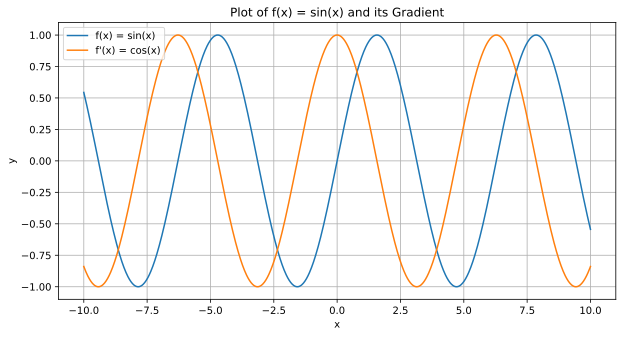

In [129]:
import torch
import matplotlib.pyplot as plt

# Define a tensor with requires_grad=True
x = torch.linspace(-10, 10, 1000, requires_grad=True)

# Compute the function f(x) = sin(x)
y = torch.sin(x)

# Compute the gradient with respect to x
y.backward(torch.ones_like(x))

# Extract the computed gradient
gradient = x.grad

# Plot the function and its gradient
plt.figure(figsize=[10, 5])
plt.plot(x.detach().numpy(), y.detach().numpy(), label='f(x) = sin(x)')
plt.plot(x.detach().numpy(), gradient.detach().numpy(), label="f'(x) = cos(x)")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of f(x) = sin(x) and its Gradient')
plt.grid(True)
plt.show()


In [130]:
x.grad

tensor([-8.3907e-01, -8.4979e-01, -8.6018e-01, -8.7021e-01, -8.7990e-01,
        -8.8924e-01, -8.9822e-01, -9.0684e-01, -9.1509e-01, -9.2298e-01,
        -9.3050e-01, -9.3765e-01, -9.4442e-01, -9.5081e-01, -9.5682e-01,
        -9.6245e-01, -9.6769e-01, -9.7254e-01, -9.7701e-01, -9.8108e-01,
        -9.8476e-01, -9.8804e-01, -9.9093e-01, -9.9342e-01, -9.9552e-01,
        -9.9721e-01, -9.9850e-01, -9.9940e-01, -9.9989e-01, -9.9999e-01,
        -9.9968e-01, -9.9897e-01, -9.9786e-01, -9.9635e-01, -9.9444e-01,
        -9.9214e-01, -9.8943e-01, -9.8633e-01, -9.8284e-01, -9.7895e-01,
        -9.7466e-01, -9.6999e-01, -9.6493e-01, -9.5948e-01, -9.5365e-01,
        -9.4743e-01, -9.4084e-01, -9.3387e-01, -9.2652e-01, -9.1880e-01,
        -9.1072e-01, -9.0227e-01, -8.9345e-01, -8.8428e-01, -8.7476e-01,
        -8.6488e-01, -8.5466e-01, -8.4410e-01, -8.3319e-01, -8.2196e-01,
        -8.1039e-01, -7.9850e-01, -7.8629e-01, -7.7376e-01, -7.6092e-01,
        -7.4778e-01, -7.3434e-01, -7.2061e-01, -7.0

In [131]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial


In [133]:
num_tossses = 100
heads = sum([random.random() > 0.5 for _ in range(100)])
tails = num_tossses - heads
print("heads, tails", [heads, tails])

heads, tails [49, 51]


In [137]:
fair_probs = torch.tensor([0.5,0.5])
Multinomial(100, fair_probs).sample()

tensor([50., 50.])

In [138]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.4954, 0.5046])

In [139]:
#As the number grows larger errors will go down at a rate of 1/sqrt(n)

In [150]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
cum_counts

tensor([[0.0000e+00, 1.0000e+00],
        [1.0000e+00, 1.0000e+00],
        [2.0000e+00, 1.0000e+00],
        ...,
        [5.0270e+03, 4.9710e+03],
        [5.0280e+03, 4.9710e+03],
        [5.0280e+03, 4.9720e+03]])

In [1]:
import torch

In [3]:
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution',

In [4]:
help(torch.zeros)

Help on built-in function zeros in module torch:

zeros(...)
    zeros(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `0`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword args:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``

In [5]:
list??

Init signature: list(iterable=(), /)
Docstring:     
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.
Type:           type
Subclasses:     _HashedSeq, StackSummary, _Threads, ConvertingList, DeferredConfigList, _ymd, SList, _ImmutableLineList, FormattedText, NodeList, ...